In [1]:
#Tamim Mahmud from Daffodil International University
#12/07/2025
#Day 18

Part->7

Softmax & Cross Entorpy Loss

In [3]:
import torch
import torch.nn.functional as F

scores=torch.tensor([2.0,1.0,0.1,100.56,34.98])

probabilites=F.softmax(scores,dim=0)

print("Probbabilities: ",probabilites)
print("Sum:",probabilites.sum())

Probbabilities:  tensor([1.5695e-43, 5.7453e-44, 2.3822e-44, 1.0000e+00, 3.3034e-29])
Sum: tensor(1.)


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

scores=torch.tensor([2.0,10.0,0.1])
labels=torch.tensor([0])

softmax=F.softmax(scores,dim=0)
log_softmax=torch.log(softmax)
loss_manual=-log_softmax[labels]

print("Manual Loss: ",loss_manual.item())


loss_fn=nn.CrossEntropyLoss()

scores_batch=scores.unsqueeze(0)
loss=loss_fn(scores_batch,labels)

print("CrossEntropyLoss :",loss.item())

Manual Loss:  8.000385284423828
CrossEntropyLoss : 8.000385284423828


In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

scores=torch.tensor([20.0,45.87,23.94,12.35])
labels=torch.tensor([0])

softmax=F.softmax(scores,dim=0)

log=torch.log(softmax)

losman=-log[labels]
print("Manual Loss: ",losman.item())

loss_fn=nn.CrossEntropyLoss()

score_bacth=scores.unsqueeze(0)

loss=loss_fn(score_bacth,labels)
print("CrossEntopyLoss: ",loss.item())


Manual Loss:  25.869998931884766
CrossEntopyLoss:  25.869998931884766


In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F

logits=torch.tensor([[2.0,1.0,0.1],
                    [1.0,3.0,4.0],
                    [2.5,6.8,9.3]])

labels=torch.tensor([0,1,2])

softmax=F.softmax(logits,dim=1)
print("proba:",softmax)
print("Sum:",softmax.sum())

loss_fn=nn.CrossEntropyLoss()

loss=loss_fn(logits,labels)
print("CEL:",loss.item())

log=torch.log(softmax)
losm=-log[range(len(labels)),labels]
print("Loss Manual per sample :",losm)

print("AVG loss manual:",losm.mean())



proba: tensor([[0.6590, 0.2424, 0.0986],
        [0.0351, 0.2595, 0.7054],
        [0.0010, 0.0758, 0.9232]])
Sum: tensor(3.0000)
CEL: 0.6153202652931213
Loss Manual per sample : tensor([0.4170, 1.3490, 0.0799])
AVG loss manual: tensor(0.6153)


MNIST প্রজেক্টের বেসিক কথা — একদম সহজ ভাষায়
১. কী হলো MNIST?

MNIST হলো ২৮×২৮ পিক্সেলের ছবি গুলো যেখানে হাতের লেখা সংখ্যা (0 থেকে 9) আছে।

আমাদের কাজ হলো, মেশিনকে শেখানো এই ছবি দেখে ঠিক সংখ্যা চিনতে।

২. মডেল কি?

মডেল হলো একটা প্রোগ্রাম যা ছবি দেখে বলে এইটা কোন সংখ্যা।

মডেল শিখবে কতটা ভুল এবং ঠিক হয়েছে।

শেখার মাধ্যমে মডেল আরও ভালো হবে।

৩. কোডের প্রধান কাজ কী?

ডাটা লোড করা: ছবি গুলো কম্পিউটারে নিয়ে আসা

মডেল তৈরি: একটা নিউরাল নেটওয়ার্ক বানানো যা ছবি থেকে সংখ্যা চিনবে

শেখানো (Training): মডেলকে ছবি দেখিয়ে শেখানো

পরীক্ষা (Testing): শেখার পরে মডেল কতটা ভালো কাজ করে তা দেখা



In [17]:
import torch
import torchvision
import torchvision.transforms as transforms

# লাইব্রেরি ইমপোর্ট করা হলো: ছবি নিয়ে কাজ করার জন্য এবং মডেল তৈরির জন্য

# ডাটা ট্রান্সফর্ম (প্রসেস) করার নিয়ম
transform = transforms.ToTensor()

# MNIST ট্রেনিং ডাটা ডাউনলোড এবং লোড করা হচ্ছে
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# DataLoader বানানো হচ্ছে যাতে ব্যাচে ব্যাচে ডাটা পাওয়া যায়
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# মডেল ডিফাইন করা হচ্ছে (একটা ছোট নিউরাল নেটওয়ার্ক)
class SimpleNN(torch.nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # প্রথম লেয়ার: 28*28 = 784 ইনপুট থেকে 128 নিউরন
        self.fc1 = torch.nn.Linear(28*28, 128)
        # দ্বিতীয় লেয়ার: 128 থেকে 10 নিউরন (10 ক্লাস)
        self.fc2 = torch.nn.Linear(128, 10)

    def forward(self, x):
        # ২৮x২৮ ছবি কে ১D টেনসর এ রূপান্তর (flatten)
        x = x.view(-1, 28*28)
        # প্রথম লেয়ারে ফিড দিয়ে ReLU অ্যাক্টিভেশন দেয়া হচ্ছে
        x = torch.relu(self.fc1(x))
        # দ্বিতীয় লেয়ার আউটপুট (ক্লাস স্কোর)
        x = self.fc2(x)
        return x

# মডেল ইনস্ট্যান্স তৈরি
model = SimpleNN()

# লস ফাংশন: Cross Entropy Loss (ক্লাসিফিকেশনের জন্য)
criterion = torch.nn.CrossEntropyLoss()

# অপটিমাইজার: Adam (মডেলের ওজন আপডেট করার জন্য)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# একিউরেসি হিসাবের জন্য ভেরিয়েবল
correct = 0
total = 0

# ট্রেনিং লুপ শুরু
for images, labels in train_loader:
    # গ্রেডিয়েন্ট জিরো করা হচ্ছে (আগের ব্যাচের গ্রেডিয়েন্ট মুছে)
    optimizer.zero_grad()

    # মডেলে ছবি পাঠিয়ে আউটপুট (logits) পাওয়া
    outputs = model(images)

    # লস ক্যালকুলেট করা হচ্ছে
    loss = criterion(outputs, labels)

    # ব্যাকওয়ার্ড পাস (গ্রেডিয়েন্ট হিসাব)
    loss.backward()

    # অপটিমাইজার দিয়ে মডেলের ওজন আপডেট করা হচ্ছে
    optimizer.step()

    # prediction বের করা হচ্ছে (সবচেয়ে বেশি স্কোর যে ক্লাসের, সেটা)
    _, predicted = torch.max(outputs, 1)

    # কতগুলো prediction সঠিক হয়েছে সেটা গোনা হচ্ছে
    correct += (predicted == labels).sum().item()

    # মোট ছবির সংখ্যা গোনা হচ্ছে
    total += labels.size(0)

# ট্রেনিং শেষে একিউরেসি ক্যালকুলেট
accuracy = 100 * correct / total
print(f'Training Accuracy: {accuracy:.2f}%')


Training Accuracy: 90.89%


Training Accuracy: 90.89% মানে কী?

Training Accuracy হলো ট্রেনিং ডাটাতে মডেলের পারফরম্যান্সের পরিমাপ।


এখানে ৯০.৮৯% মানে হলো মডেল যখন ট্রেনিং ডাটার ছবি দেখে অনুমান করেছে, তখন প্রায় ৯১% ছবির সঠিক সংখ্যা চিনতে পেরেছে।


অন্য কথায়, ১০০ টা ছবির মধ্যে ৯১ টা ছবি মডেল ঠিকমতো ক্লাসিফাই করেছে।


উদাহরণ:

ধরো, মোট ট্রেনিং ডাটাতে ৬০০০০ ছবি আছে।


মডেল সঠিকভাবে চিনেছে ৫৪৫৩৪ টি ছবি।


তাহলে Accuracy = (৫৪৫৩৪ / ৬০০০০) × ১০০ = ৯০.৮৯%



In [19]:
#Part->-8

#Activation Function

Sigmoid: tensor([0.2689, 0.5000, 0.7311, 0.8808])
Tanh: tensor([-0.7616,  0.0000,  0.7616,  0.9640])
ReLu: tensor([0., 0., 1., 2.])
Leaky ReLU: tensor([-0.0100,  0.0000,  1.0000,  2.0000])


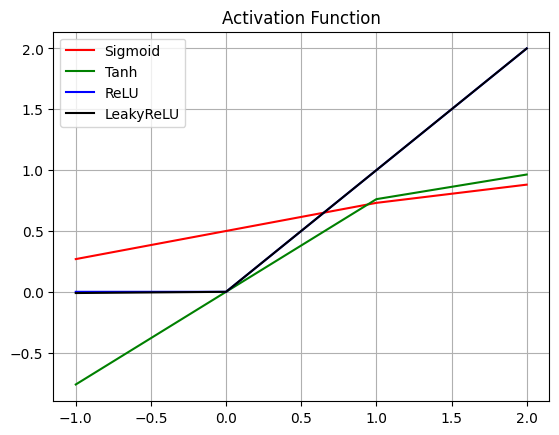

In [26]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

x=torch.tensor([-1.0,0.0,1.0,2.0])

sigmoid=torch.sigmoid(x)
tanh=torch.tanh(x)
relu=F.relu(x)
leaky_relu=F.leaky_relu(x)

print("Sigmoid:",sigmoid)
print("Tanh:",tanh)
print("ReLu:",relu)
print("Leaky ReLU:",leaky_relu) #Leaky ReLU নেগেটিভ ইনপুটের জন্য একটু ছোট নেগেটিভ ভ্যালু রেখে দেয়, ০ করে দেয় না, তাই Dead Neuron সমস্যা কমে।

plt.figure(figsize=(10,6))
plt.plot(x,sigmoid,label='Sigmoid',color='red')
plt.plot(x,tanh,label='Tanh',color='green')
plt.plot(x,relu,label='ReLU',color='blue')
plt.plot(x,leaky_relu,label='LeakyReLU',color='black')
plt.legend()
plt.title('Activation Function')
plt.grid(True)
plt.show()

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

# ডেটা ট্রান্সফর্ম আর ডেটাসেট লোড
transform = transforms.ToTensor()
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# মডেল ডিফাইন
class SimpleNN(nn.Module):
    def __init__(self, activation='relu'):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)
        self.activation = activation

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)

        if self.activation == 'relu':
            x = F.relu(x)
        elif self.activation == 'sigmoid':
            x = torch.sigmoid(x)
        elif self.activation == 'tanh':
            x = torch.tanh(x)
        elif self.activation == 'leaky_relu':
            x = F.leaky_relu(x)
        else:
            x = F.relu(x)

        x = self.fc2(x)
        return x

# মডেল, ক্রসএন্ট্রপি লস, অপটিমাইজার
model = SimpleNN(activation='relu')  # 'relu', 'sigmoid', 'tanh', 'leaky_relu' চেষ্টা করো
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# ট্রেনিং লুপ
for epoch in range(5):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if (i + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/5], Step [{i+1}/{len(train_loader)}], Loss: {running_loss/100:.4f}")
            running_loss = 0.0

print("Training finished!")


Epoch [1/5], Step [100/938], Loss: 0.9660
Epoch [1/5], Step [200/938], Loss: 0.3824
Epoch [1/5], Step [300/938], Loss: 0.3319
Epoch [1/5], Step [400/938], Loss: 0.3074
Epoch [1/5], Step [500/938], Loss: 0.2813
Epoch [1/5], Step [600/938], Loss: 0.2706
Epoch [1/5], Step [700/938], Loss: 0.2445
Epoch [1/5], Step [800/938], Loss: 0.2251
Epoch [1/5], Step [900/938], Loss: 0.2361
Epoch [2/5], Step [100/938], Loss: 0.1870
Epoch [2/5], Step [200/938], Loss: 0.1773
Epoch [2/5], Step [300/938], Loss: 0.1636
Epoch [2/5], Step [400/938], Loss: 0.1656
Epoch [2/5], Step [500/938], Loss: 0.1735
Epoch [2/5], Step [600/938], Loss: 0.1612
Epoch [2/5], Step [700/938], Loss: 0.1572
Epoch [2/5], Step [800/938], Loss: 0.1451
Epoch [2/5], Step [900/938], Loss: 0.1454
Epoch [3/5], Step [100/938], Loss: 0.1187
Epoch [3/5], Step [200/938], Loss: 0.1120
Epoch [3/5], Step [300/938], Loss: 0.1042
Epoch [3/5], Step [400/938], Loss: 0.1148
Epoch [3/5], Step [500/938], Loss: 0.1174
Epoch [3/5], Step [600/938], Loss:

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
df = pd.read_csv('titanic.csv')

# Encode categorical columns
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop rows with missing values in critical columns
df = df.dropna(subset=['Age', 'Embarked', 'Cabin'])

# Select features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features].values
y = df['Survived'].values

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Define model
class ReLu(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(len(features), 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        return self.fc2(x)

model = ReLu()

# Loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(1000):
    logits = model(X_train)
    loss = loss_fn(logits, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f"[CE] Epoch {epoch+1}, Loss: {loss.item():.4f}")

# Evaluation
with torch.no_grad():
    pred = model(X_test)
    predicted = torch.argmax(pred, dim=1)
    acc = (predicted == y_test).float().mean()
    print(f"[CE] Accuracy: {acc.item()*100:.2f}%")
